# Objective
Basic clustering and analysis for an SNR test image with the following properties:

## Takeaway:

With a preliminary look, it seems that in the sparser region, more stray annotations were picked up and interpreted as very small clusters. (So mean and stdev for number of unique workers in a cluster, although printed here, may not be super useful.) Also, more clusters have a large fraction of all annotators.

Therefore, this case study seems to suggest that in the sparser region:
- it would be easier to detect clusters that should be multiple spots, e.g. the cluster at (100,200), and
- it would be easier to detect stray spots that are far from clusters most workers agree on, since they get clustered separately as very small clusters.

## Possibile next step:
- It may be interesting to see if clustering on the dense region more closely resembles clustering on the sparser region when we give turkers a dense region cropped closer in.

## To do:
- Quantify the density of these regions. 
    - (number of spots / area with spots, rather than number of spots / area of image, since there are empty regions)

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 4
cluster_marker_size = 40
bigger_window_size = True

csv_filepath = None
show_correctness_workers = False
show_correctness_clusters = False
correctness_threshold = None
show_NN_inc = False
show_ref_points = False

### Load data, get the dataframe 

In [2]:
img_filename = 'C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_300_inv.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/StarFISH-tools/Annotation/C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_300.png'
json_filepath = '/Users/jenny.vo-phamhi/Documents/StarFISH-tools/Annotation/smFISH_cells_inv.json'

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_image = ba.slice_by_image(anno_all, img_filename)

# Overview of Annotations 

### Image only

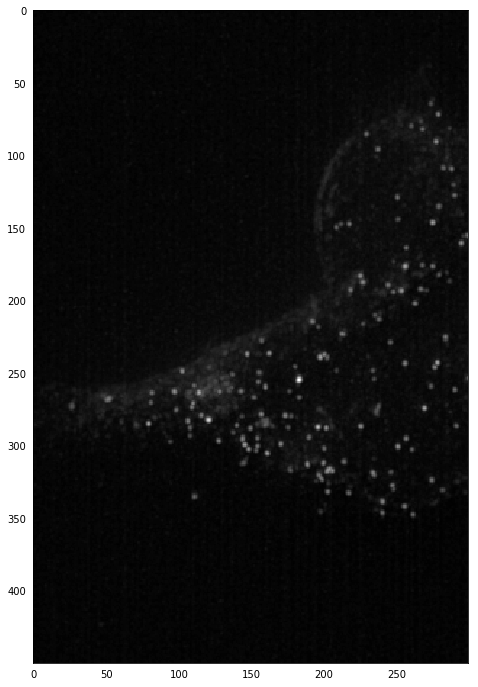

In [3]:
show_workers = False
show_clusters = False
clustering_params = None
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Worker annotations only

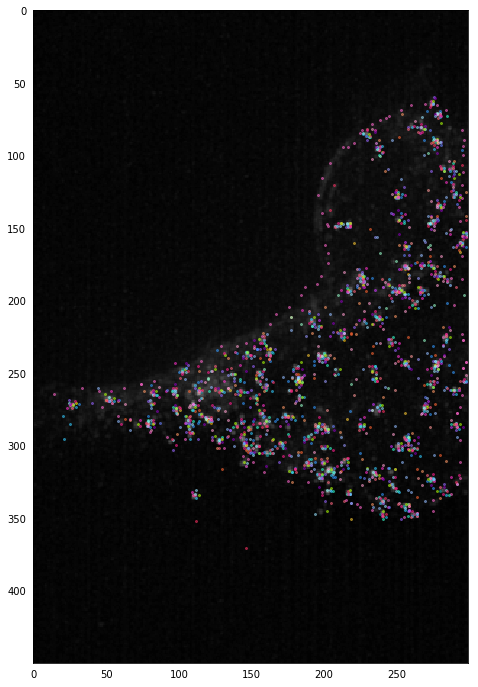

In [4]:
show_workers = True
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Worker annotations and cluster centroids

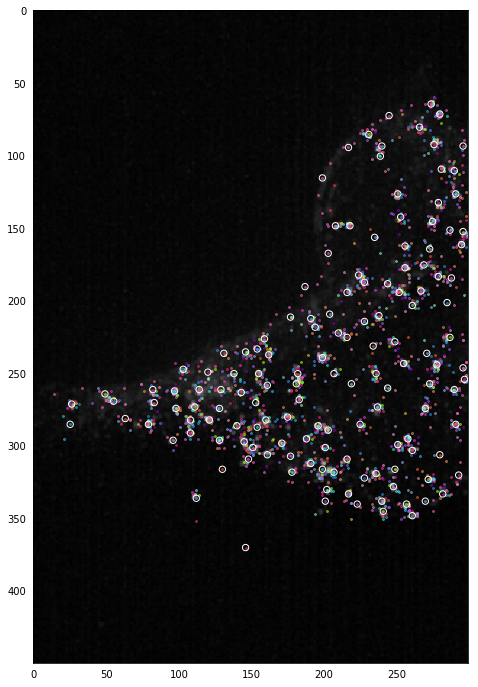

In [5]:
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Cluster centroids only

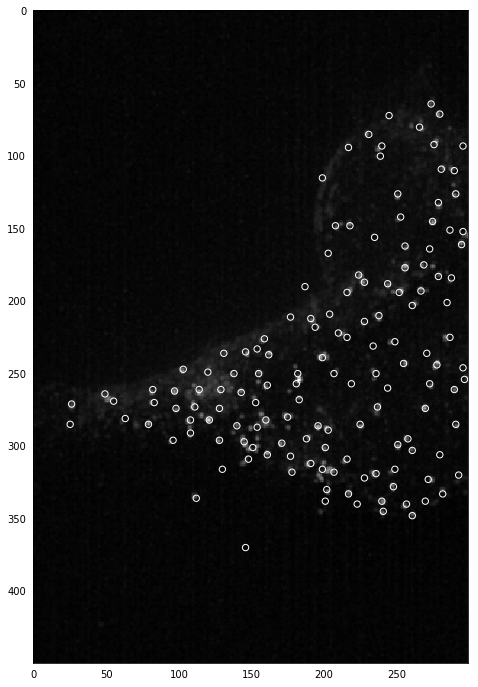

In [6]:
show_workers = False
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

In [7]:
clusters = sa.get_clusters(anno_one_image, clustering_params)

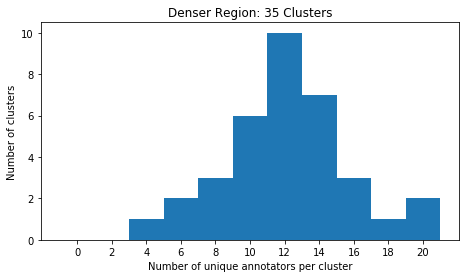

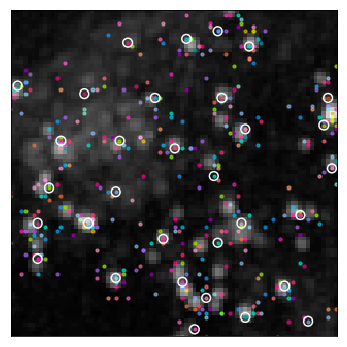

In [8]:
img_height = 450
x_min = 100
x_max = 200
y_min_on_plot = 200
y_max_on_plot = 300
density = 'Denser'
img_name = '300_inv_clustered_af_-350_zoom_dense.png'

sa.plot_cluster_membership_in_region(clusters, img_height, x_min, x_max, y_min_on_plot, y_max_on_plot, img_name, density)

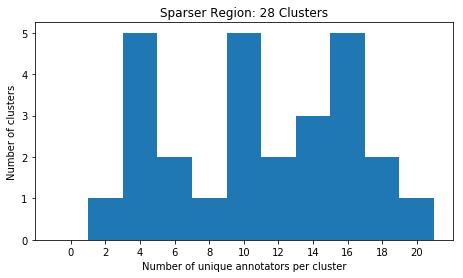

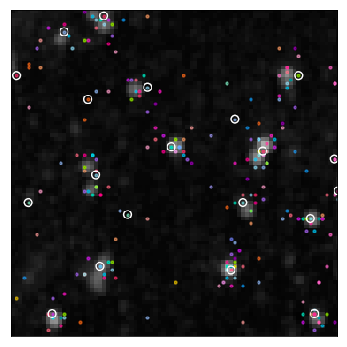

In [9]:
img_height = 450
x_min = 200
x_max = 300
y_min_on_plot = 200
y_max_on_plot = 300
density = 'Sparser'
img_name = '300_inv_clustered_af_-350_zoom_sparse.png'

sa.plot_cluster_membership_in_region(clusters, img_height, x_min, x_max, y_min_on_plot, y_max_on_plot, img_name, density)